In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as colors
import matplotlib 
import numpy as np

## Exercise 1:

a) Read the given oldtimer.png image.

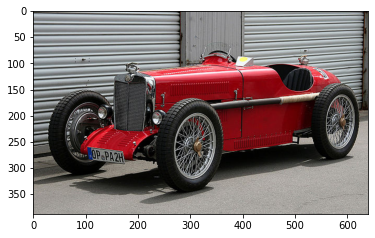

In [0]:
img_arr = mpimg.imread('oldtimer.png')
plt.imshow(img_arr)

b) Convert the color image to HSV color space, and create a grayscale version by retaining only the
value.

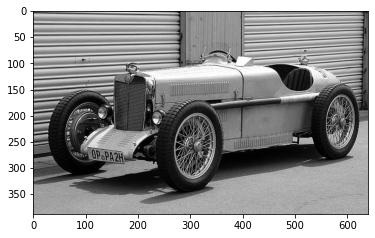

In [0]:
img_hsv = colors.rgb_to_hsv(img_arr)
img_gray = img_hsv[:,:,2]
plt.imshow(img_gray,cmap = "gray")

c) Think about another way to convert color image to grayscale. Its result should look reasonable
(with bright regions appearing bright), but it should differ from the one you obtained from the
HSV color space. Implement and briefly justify your method.

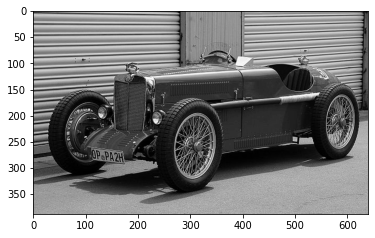

In [0]:
rgb_weights = [0.2989, 0.5870, 0.1140]
img2_gray = np.dot(img_arr[...,:3], rgb_weights)
plt.imshow(img2_gray, cmap="gray")

d) Output a version of the image in which saturation has been reduced by 50%.

Ans : In a HSV image S denotes the saturation i.e. it is the intensity of the color compared to white (the least saturated color)

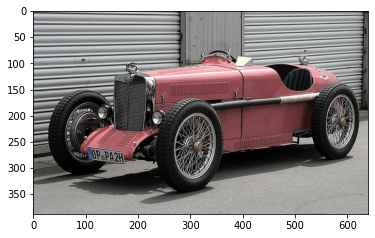

In [0]:
img_hsv[:,:,1] /= 2
image_hsv = colors.hsv_to_rgb(img_hsv)
plt.imshow(image_hsv)

e) Create a simple “aged photograph” effect by globally blending (via simple weighted averaging or
some other blend mode of your choice) the half-desaturated image from the previous step with
some amount of brown. (2P)

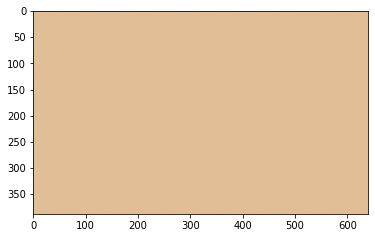

In [0]:
# brown color dimensions for blending
brown = np.zeros((img_arr.shape[0],img_arr.shape[1],3))
brown[:,:,0] = 225/255.0
brown[:,:,1] = 190/255.0
brown[:,:,2] = 150/255.0
plt.imshow(brown)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


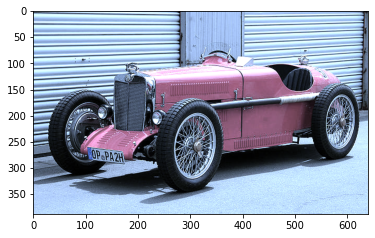

In [0]:
# Division blending
img_aged = image_hsv/brown
plt.imshow(img_aged)

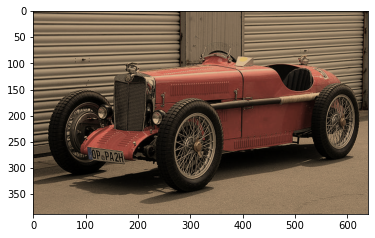

In [0]:
#Multiplication Blending
img_aged = image_hsv*brown
plt.imshow(img_aged)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


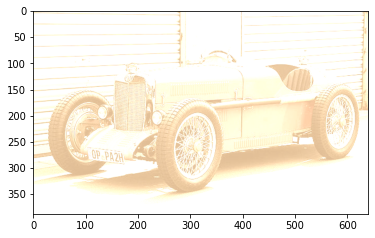

In [0]:
#Additive Blending
img_aged = image_hsv+brown
plt.imshow(img_aged)

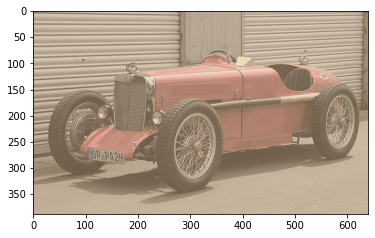

In [0]:
#Average Blending
img_aged = (image_hsv+brown)/2
plt.imshow(img_aged)

f) Rotate the hues of the original image so that the car obtains a different color. Provide two images
in which the car is blue, and has another color of your choice

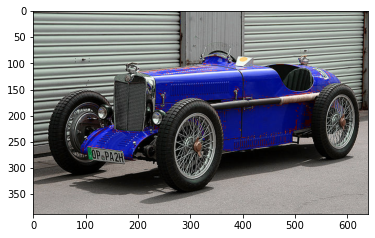

In [0]:
#Blue Color
imge_hsv = colors.rgb_to_hsv(img_arr)
imge_hsv[:,:,0]=imge_hsv[:, :, 0] * 0.66
image_rot=colors.hsv_to_rgb(imge_hsv)
plt.imshow(image_rot)

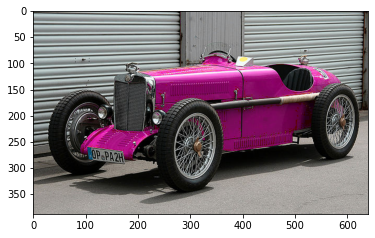

In [0]:
#Pink color
imge_hsv = colors.rgb_to_hsv(img_arr)
imge_hsv[:,:,0]=imge_hsv[:, :, 0] * 0.89
image_rot=colors.hsv_to_rgb(imge_hsv)
plt.imshow(image_rot)

## Exercise 4:

a) Plotting Categorical Data

In [0]:
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


d) Read the dataset using pandas read_excel function.

In [0]:
read_xl = pd.read_excel("chronic_kidney_disease_numerical.xls")
read_xl.head()

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,ckd
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,ckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,ckd
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,ckd


e) Use pandas.melt to transform the data from “wide” to “long” format, using class (indicating
ckd for chronic kidney disease or notckd for its absence) as the identifier variable.

In [0]:
class_wide = pd.melt(read_xl, id_vars=["class"])
class_wide.head()

,class,variable,value
0,ckd,age,48.0
1,ckd,age,7.0
2,ckd,age,62.0
3,ckd,age,48.0
4,ckd,age,51.0


In [0]:
melt = pd.melt(read_xl, id_vars=['class'])
ckd = melt[melt['class']=='ckd']
ckd.head()

,class,variable,value
0,ckd,age,48.0
1,ckd,age,7.0
2,ckd,age,62.0
3,ckd,age,48.0
4,ckd,age,51.0


In [0]:
notckd = melt[melt['class']=='notckd']
notckd.head()

,class,variable,value
250,notckd,age,40.0
251,notckd,age,23.0
252,notckd,age,45.0
253,notckd,age,57.0
254,notckd,age,51.0


f) For each numerical attribute, such as age or blood pressure, create two boxplots side-by-side. One
should show the attribute’s distribution among patients suffering from chronic kidney disease, the
other one from patients who do not suffer from the disease. Hint: Due to the different numerical
ranges, you will have to disable sharing of y axes between plots of different attributes.

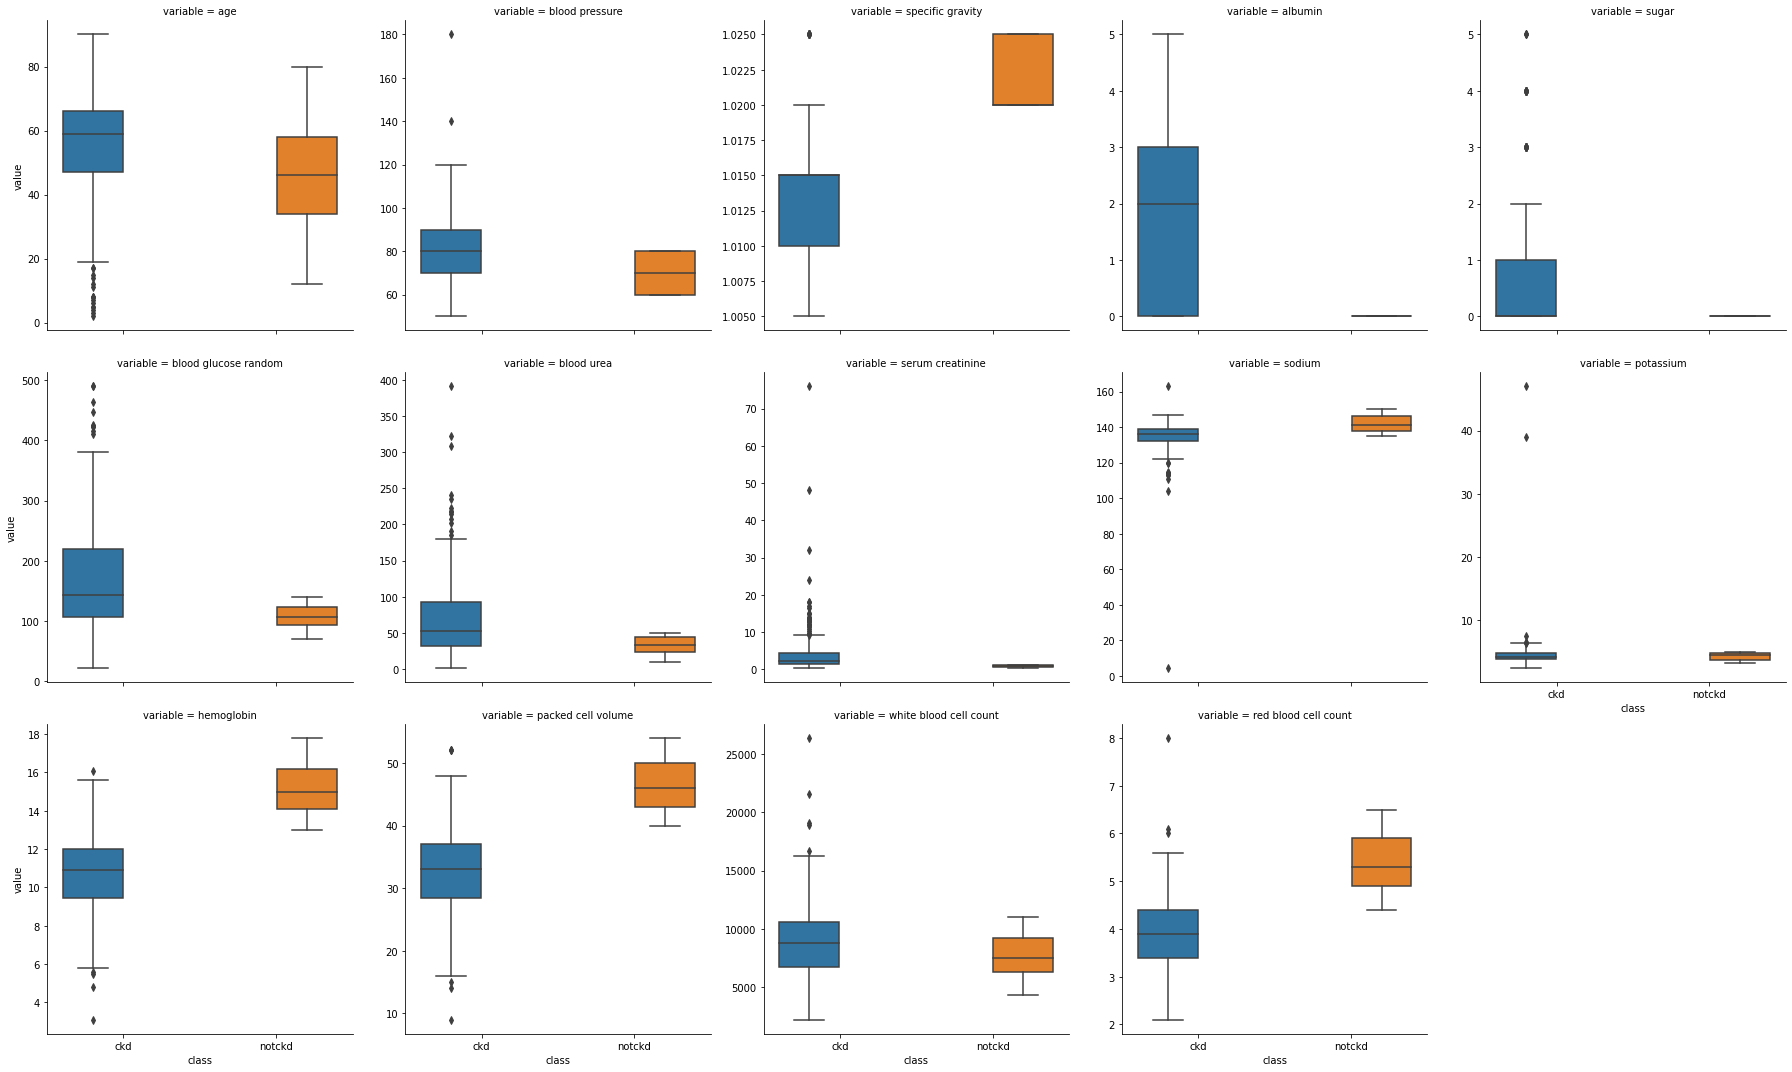

In [0]:
ckd = ckd[ckd['variable']!='white blood cell count']
notckd = melt[melt['variable']!='white blood cell count']
sns.catplot(x='class', y='value', hue='class', col='variable', kind="box", data=melt, col_wrap=5, sharey=False)

g) Based on viewing the plots, name an attribute that appears to be highly indicative of chronic kidney disease, and one that seems to be mostly unrelated to it.

Ans :

**highly indicative** - albumin, blood glucose, sugar, blood urea \\
**mostly unrelated** - serum creatinine, age, blood pressure, wbc.

(*potassium* and *sodium* data are insignificant)